## Récupération des données.

In [37]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import sklearn as sk
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Visualisation des statistiques 

### Head & Info

In [38]:
df = pd.read_csv('data/raw/carData.csv')
print(df.head())
print(df.info())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non

In [39]:
# valeur manquante 
print(df.isnull().sum())


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


### Infos

Le jeu de données est composé de **9 colonnes** :

- **Car_name** : nom de la voiture.
- **Year** : année de fabrication de la voiture.
- **Selling_Price** : prix auquel le propriétaire souhaite vendre la voiture (la cible).
- **Present_Price** : prix de la voiture en sortie d’usine.
- **Kms_Driver** : distance parcourue par la voiture (en km).
- **Fuel_Type** : type de carburant de la voiture.
- **Seller_type** : indique si le vendeur est un revendeur ou un particulier.
- **Transmission** : type de boîte de vitesses (manuelle ou automatique).
- **Owner** : nombre d’anciens propriétaires de la voiture.

## Exploration des données

In [40]:
## Quelle est la taille du jeu de données ?
print(df.shape)

(301, 9)


In [41]:
import matplotlib.pyplot as plt

In [42]:
#statistiques de base (moyenne, médiane, quartile). 
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


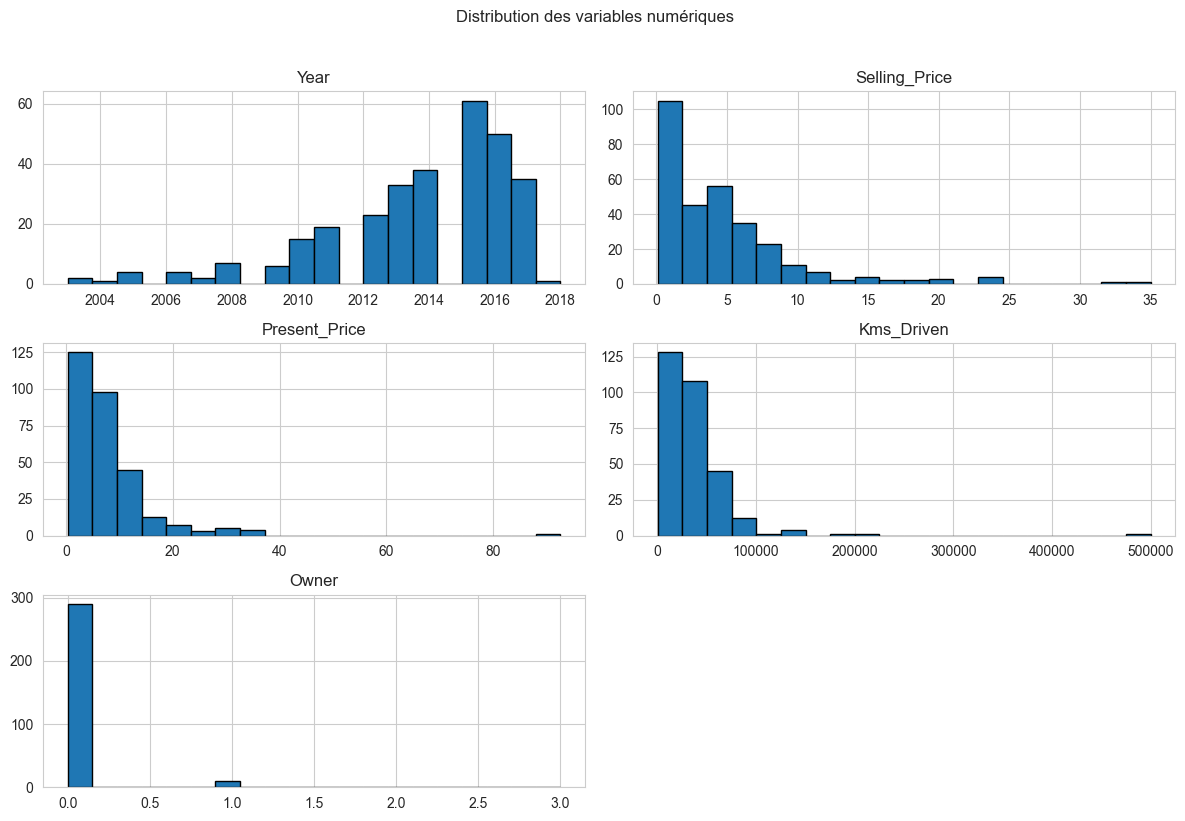

In [43]:
import matplotlib.pyplot as plt

# Histogrammes des variables numériques
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Distribution des variables numériques", y=1.02)
plt.tight_layout()
plt.show()

## Visualisation avec Seaborn : `catplot`

Le `catplot` est **pertinent** lorsqu’on veut analyser la relation entre :
- une variable **catégorielle** (ex. `Fuel_Type`, `Transmission`, `Seller_Type`) ;
- et une variable **numérique** (ex. `Selling_Price`).

Ici, on compare la distribution du prix de vente selon le type de carburant et la transmission.

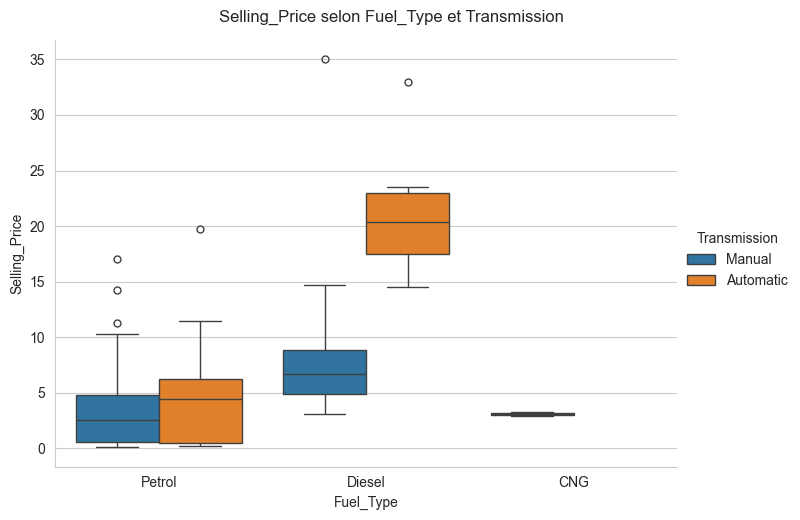

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

g = sns.catplot(
    data=df,
    x="Fuel_Type",
    y="Selling_Price",
    hue="Transmission",
    kind="box",
    height=5,
    aspect=1.4
)

g.fig.suptitle("Selling_Price selon Fuel_Type et Transmission", y=1.03)
plt.show()

### Interprétation du `catplot`

Le tracé `catplot` de type `box` permet de comparer la **distribution de `Selling_Price`** selon des catégories (`Fuel_Type`) et une sous-catégorie (`Transmission`).

- La **ligne au centre** de chaque boîte représente la médiane du prix.
- La **hauteur de la boîte** (IQR) montre la dispersion des prix.
- Les **points extrêmes** indiquent des véhicules atypiques (prix très élevés ou très bas).

Dans ce contexte, ce graphique est pertinent pour :
- comparer rapidement les niveaux de prix entre types de carburant ;
- voir si la transmission (manuelle/automatique) influence le prix au sein d’un même carburant ;
- détecter les groupes les plus hétérogènes et les valeurs aberrantes.

En résumé, le `catplot` est idéal quand on veut analyser une variable numérique en fonction de variables catégorielles.

## Âge vs prix de vente : corrélation et régression linéaire

Objectif : quantifier la relation entre l’**âge** de la voiture et son **prix de vente**.

- On crée la variable `Age = année_actuelle - Year`.
- On calcule la **corrélation de Pearson** entre `Age` et `Selling_Price`.
- On ajuste une **régression linéaire simple** (`Selling_Price ~ Age`).
- On visualise avec Matplotlib :
  - un nuage de points + droite de régression ;
  - une matrice de corrélation (Pearson) sur les variables numériques.

Rappel (veille rapide) : la régression linéaire est pertinente si la relation est approximativement linéaire, avec résidus sans structure forte et variance relativement stable.

Corrélation de Pearson (Age, Selling_Price) : -0.2361
p-value : 3.495e-05
Pente (coefficient) : -0.4151
Intercept : 6.0610
R² : 0.0558


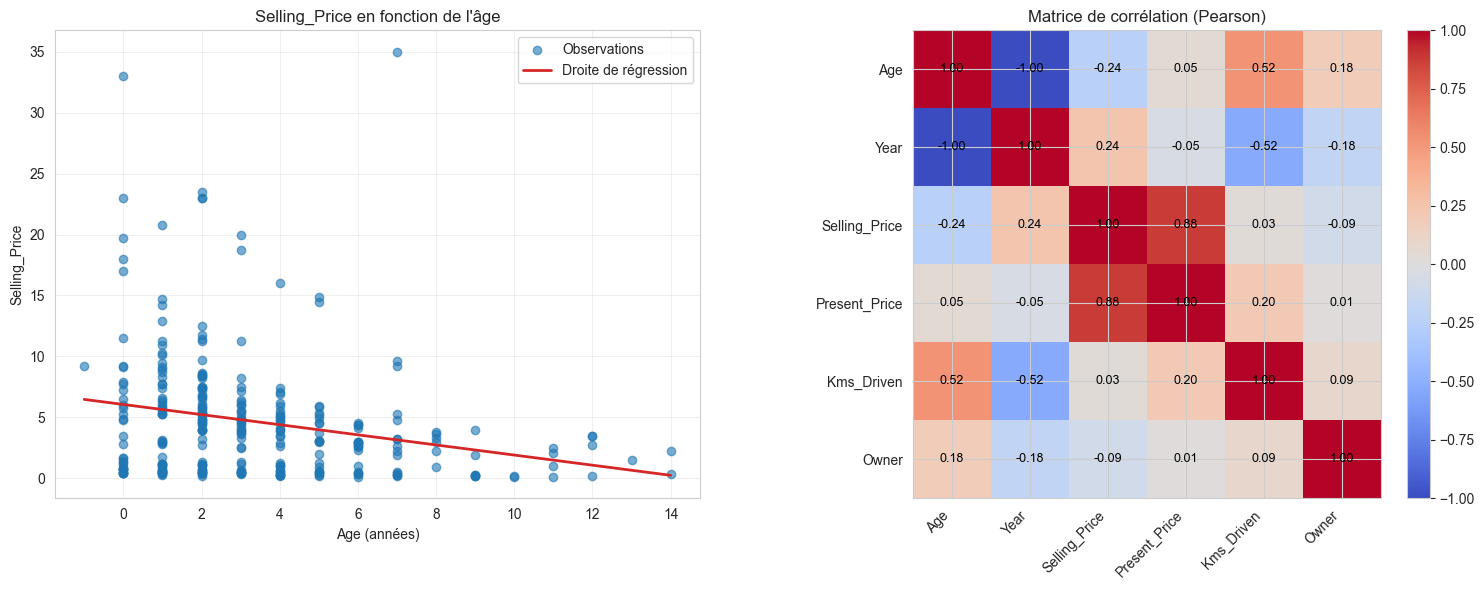

In [45]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1) Création de la variable âge
df["Age"] = 2017 - df["Year"]

# 2) Corrélation de Pearson (Age vs Selling_Price)
corr, p_value = pearsonr(df["Age"], df["Selling_Price"])

# 3) Régression linéaire simple : Selling_Price ~ Age
X = df[["Age"]].values
y = df["Selling_Price"].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = model.score(X, y)
slope = model.coef_[0]
intercept = model.intercept_

print(f"Corrélation de Pearson (Age, Selling_Price) : {corr:.4f}")
print(f"p-value : {p_value:.4g}")
print(f"Pente (coefficient) : {slope:.4f}")
print(f"Intercept : {intercept:.4f}")
print(f"R² : {r2:.4f}")

# 4) Visualisations Matplotlib
numeric_cols = ["Age", "Year", "Selling_Price", "Present_Price", "Kms_Driven", "Owner"]
numeric_cols = [col for col in numeric_cols if col in df.columns]
corr_matrix = df[numeric_cols].corr(method="pearson")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# a) Scatter + droite de régression
axes[0].scatter(df["Age"], df["Selling_Price"], alpha=0.6, color="tab:blue", label="Observations")
order = np.argsort(df["Age"].values)
axes[0].plot(df["Age"].values[order], y_pred[order], color="tab:red", linewidth=2, label="Droite de régression")
axes[0].set_title("Selling_Price en fonction de l'âge")
axes[0].set_xlabel("Age (années)")
axes[0].set_ylabel("Selling_Price")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# b) Matrice de corrélation Pearson (Matplotlib)
im = axes[1].imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
axes[1].set_xticks(range(len(corr_matrix.columns)))
axes[1].set_yticks(range(len(corr_matrix.columns)))
axes[1].set_xticklabels(corr_matrix.columns, rotation=45, ha="right")
axes[1].set_yticklabels(corr_matrix.columns)
axes[1].set_title("Matrice de corrélation (Pearson)")

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        axes[1].text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black", fontsize=9)

fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

Il existe une corrélation linéaire faible et négative entre l'age et le prix de vente.
On peut utiliser la régression linéaire pour obtenir des prédictions proches sans être pour autant précises.
En utilisant Scipy, on trouve que le p-value est inférieure à 0.05, donc la corrélation est en effet significative.
En utilisant Scikit-learn on modélise la relation linéaire et on l'évalue.
L'évaluation avec R² nous montre que seulement avec l'âge, le modèle explique très peu la variation.

In [46]:
df["Transmission_num"] = df["Transmission"].map({"Manual": 0, "Automatic": 1})

Variables = ["Age","Kms_Driven","Transmission_num"]
x_variables = df[Variables].values
y_variables = df["Selling_Price"].values

model_variables = LinearRegression()
model_variables.fit(x_variables,y_variables)
y_prediction_variables = model_variables.predict(x_variables)

for var,coef in zip(Variables,model_variables.coef_):
    print(f"Coefficient pour {var} : {coef:.4f}")
print(f"Intercept : {model_variables.intercept_:.4f}")
print(f"R² : {model_variables.score(x_variables,y_variables):.4f}")
print(f"Mean Squared Error : {mean_squared_error(y_variables,y_prediction_variables)}")
print(f"Root Mean Squared Error : {mean_squared_error(y_variables,y_prediction_variables)**0.5}")
print(f"Mean Absolute Error : {mean_absolute_error(y_variables,y_prediction_variables)}")

Coefficient pour Age : -0.5385
Coefficient pour Kms_Driven : 0.0000
Coefficient pour Transmission_num : 5.1651
Intercept : 5.1453
R² : 0.2031
Mean Squared Error : 20.519495260999804
Root Mean Squared Error : 4.529844948891717
Mean Absolute Error : 3.09563501522909


On a dû transformer la colonne transmission en valeur numérique. Manual = 0 , Automatique = 1.
Les différentes mesures de qualité ont montré que les prédictions sont assez éloignées des valeurs réelles pour l'instant.
D'autres variables sont à prendre en compte.

La variable de kilométrage a un impact négligeable dans le modèle.
Désormais il faut rajouter et comparer les différentes colonnes non exploitées pour définir les plus impactantes.

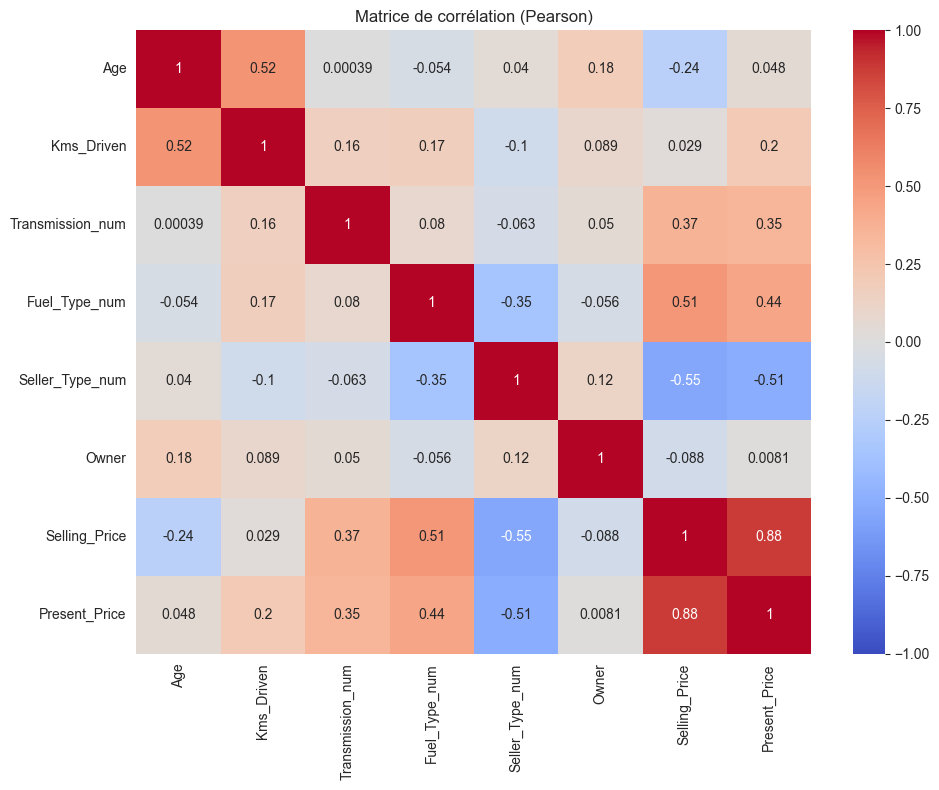

In [47]:
df["Seller_Type_num"] = df["Seller_Type"].map({"Dealer": 0, "Individual": 1})
df["Fuel_Type_num"] = df["Fuel_Type"].map({"Petrol": 0, "Diesel": 1, "CNG": 2})

# Définir les colonnes à inclure dans la matrice de corrélation
corr_cols = ["Age","Kms_Driven","Transmission_num","Fuel_Type_num","Seller_Type_num","Owner","Selling_Price", "Present_Price"]
corr_matrix = df[corr_cols].corr(method="pearson")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matrice de corrélation (Pearson)")
plt.tight_layout()
plt.show()

On observe que les variables rajoutées ont de l'importance dans la matrice de corrélation.
On va donc les rajouter dans le modèle.

In [48]:
Variables = ["Age","Kms_Driven","Transmission_num","Fuel_Type_num","Seller_Type_num","Owner", "Present_Price"]
x_variables = df[Variables].values
y_variables = df["Selling_Price"].values

model_variables = LinearRegression()
model_variables.fit(x_variables,y_variables)
y_prediction_variables = model_variables.predict(x_variables)

for var,coef in zip(Variables,model_variables.coef_):
    print(f"Coefficient pour {var} : {coef:.4f}")
print(f"Intercept : {model_variables.intercept_:.4f}")
print(f"R² : {model_variables.score(x_variables,y_variables):.4f}")
print(f"Mean Squared Error : {mean_squared_error(y_variables,y_prediction_variables)}")
print(f"Root Mean Squared Error : {mean_squared_error(y_variables,y_prediction_variables)**0.5}")
print(f"Mean Absolute Error : {mean_absolute_error(y_variables,y_prediction_variables)}")

Coefficient pour Age : -0.4039
Coefficient pour Kms_Driven : -0.0000
Coefficient pour Transmission_num : 1.4304
Coefficient pour Fuel_Type_num : 1.4930
Coefficient pour Seller_Type_num : -1.1037
Coefficient pour Owner : -0.6806
Coefficient pour Present_Price : 0.4460
Intercept : 2.7673
R² : 0.8785
Mean Squared Error : 3.1279904666578937
Root Mean Squared Error : 1.768612582409696
Mean Absolute Error : 1.1824785885946245


On voit que le R² est beaucoup plus précis en rajoutant le reste des colonnes.
Après études plus pointues du DataSet, on observe 2 lignes avec "CNG" en tant que Fuel Type.
On va les supprimer pour avoir des prédictions plus précises

In [49]:
df = df[df["Fuel_Type"] != "CNG"]
df.reset_index(drop=True, inplace=True)
print("Lignes restantes après suppression :", len(df))

Lignes restantes après suppression : 299


In [50]:
Variables = ["Age","Kms_Driven","Transmission_num","Fuel_Type_num","Seller_Type_num","Owner", "Present_Price"]
x_variables = df[Variables].values
y_variables = df["Selling_Price"].values

model_variables = LinearRegression()
model_variables.fit(x_variables,y_variables)
y_prediction_variables = model_variables.predict(x_variables)

for var,coef in zip(Variables,model_variables.coef_):
    print(f"Coefficient pour {var} : {coef:.4f}")
print(f"Intercept : {model_variables.intercept_:.4f}")
print(f"R² : {model_variables.score(x_variables,y_variables):.4f}")
print(f"Mean Squared Error : {mean_squared_error(y_variables,y_prediction_variables)}")
print(f"Root Mean Squared Error : {mean_squared_error(y_variables,y_prediction_variables)**0.5}")
print(f"Mean Absolute Error : {mean_absolute_error(y_variables,y_prediction_variables)}")

Coefficient pour Age : -0.3933
Coefficient pour Kms_Driven : -0.0000
Coefficient pour Transmission_num : 1.4482
Coefficient pour Fuel_Type_num : 1.8622
Coefficient pour Seller_Type_num : -1.1214
Coefficient pour Owner : -0.6738
Coefficient pour Present_Price : 0.4372
Intercept : 2.7760
R² : 0.8825
Mean Squared Error : 3.043761662628687
Root Mean Squared Error : 1.7446379746608427
Mean Absolute Error : 1.1782125184935095


Le coefficient pour Fuel_Type_Num a augmenté, signe que la prédiction était brouillée à cause des 2 lignes sur CNG.
Le R² aussi augmente légèrement R² : 0.8825 (avant : 0.8785).

En conclusion, les facteurs qui déterminent le plus le prix sont : 
Les plus gros facteurs sont 
- **Le prix d'origine**, 
- **L'âge**, 
- **Le type de carburant** 
- **La transmission**.